In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from network import *
from config import *
from plot import *

### Uniform Network


In [3]:
uniform_network = CorticalNetwork(equations, N_exc, N_inh, V, taus, mus, J_uniform, P_uniform, is_cluster=False)
state_monitor_uniform_network, spike_monitor_uniform_network, spike_train_uniform_network = uniform_network.run_network(duration1, duration2, N_realizations, N_trials, N_split=N_split)

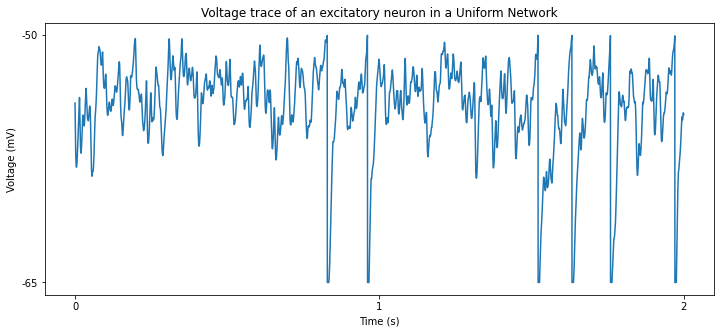

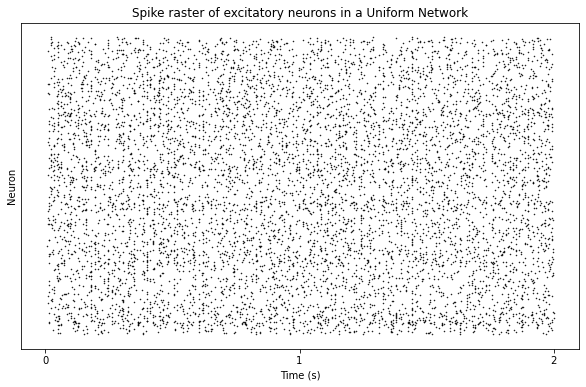

In [4]:
voltage_trace_plot(state_monitor_uniform_network, network_type='Uniform')
spike_raster_plot(spike_monitor_uniform_network, network_type='Uniform')

### Clustered Network

In [5]:
cluster_network = CorticalNetwork(equations, N_exc, N_inh, V, taus, mus, J_cluster, P_cluster, N_cluster=N_cluster, is_cluster=True)
state_monitor_cluster_network, spike_monitor_cluster_network, spike_train_cluster_network = cluster_network.run_network(duration1, duration2, N_realizations, N_trials, N_split=N_split)

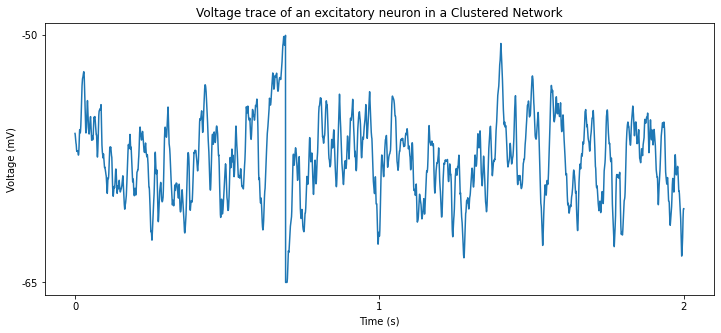

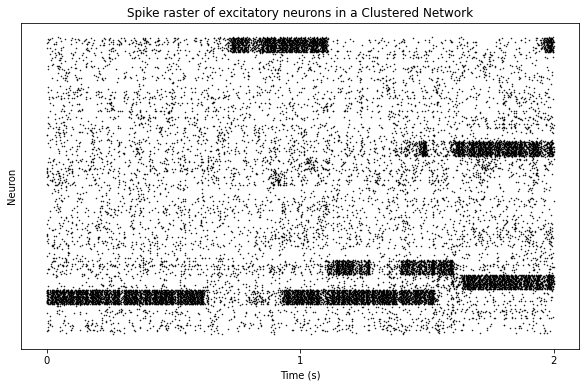

In [6]:
voltage_trace_plot(state_monitor_cluster_network, network_type='Clustered')
spike_raster_plot(spike_monitor_cluster_network, network_type='Clustered')

### Analysis


In [ ]:
# tbd